# Project-Customer-Conversion-Prediction

# Importing Python Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime, nltk, warnings


# Data load in the frame 

In [1]:
import pandas as pd  # Import the Pandas library

# Now you can read your CSV file
df = pd.read_csv(r"C:\\Users\\Asus\\Documents\\content\\train.csv", encoding="latin1")


print(df)

# Data set size

In [2]:
df.shape

(45211, 11)

In [22]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [23]:
df.tail()


,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no
45210,37,entrepreneur,married,secondary,cellular,17,nov,361,2,other,no


In [28]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [29]:
df.describe()

,age,day,dur,num_calls
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,258.163080,2.763841
std,10.618762,8.322476,257.527812,3.098021
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,319.000000,3.000000
max,95.000000,31.000000,4918.000000,63.000000


In [30]:
df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [ ]:
Data cleaning is the process of identifying and correcting or removing errors, inconsistencies, and inaccuracies in data before it is used for analysis. It involves a series of techniques and tools to ensure that data is accurate, complete, and consistent.

In [33]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [34]:
df.duplicated().sum()

6

In [37]:
df = df.drop_duplicates()

In [38]:
df.duplicated().sum()

0

In [41]:
df.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

In [42]:
print("Unique values of Job \n")
print(df['job'].unique())

Unique values of Job 

['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']


In [43]:
print("Unique values of Marital Status \n")
print(df['marital'].unique())

Unique values of Marital Status 

['married' 'single' 'divorced']


In [44]:
print("Unique values of Call Type \n")
print(df['call_type'].unique())

Unique values of Call Type 

['unknown' 'cellular' 'telephone']


In [45]:
print("Unique values of Educationsl Qualification \n")
print(df['education_qual'].unique())

Unique values of Educationsl Qualification 

['tertiary' 'secondary' 'unknown' 'primary']


In [46]:
print("Unique values of Month \n")
print(df['mon'].unique())

Unique values of Month 

['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']


In [47]:
print("Unique values of Previous Outcome \n")
print(df['prev_outcome'].unique())

Unique values of Previous Outcome 

['unknown' 'failure' 'other' 'success']


In [51]:
print("Unique values of Target Variable 'y' \n")
print(df['y'].unique())

Unique values of Target Variable 'y' 

['no' 'yes']


In [17]:
df['target'] = df["y"].map({"yes":1 , "no": 0})

In [18]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no,0
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no,0
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no,0
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no,0
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no,0


In [19]:
df.age.value_counts()

32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
93       2
90       2
95       2
88       2
94       1
Name: age, Length: 77, dtype: int64

In [20]:
df.groupby('age')['target'].mean()

age
18    0.583333
19    0.314286
20    0.300000
21    0.278481
22    0.310078
        ...   
90    1.000000
92    1.000000
93    1.000000
94    0.000000
95    0.500000
Name: target, Length: 77, dtype: float64

In [21]:
df.job.value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [22]:
df.groupby('job')['target'].mean()

job
admin.           0.122027
blue-collar      0.072750
entrepreneur     0.082717
housemaid        0.087903
management       0.137556
retired          0.227915
self-employed    0.118429
services         0.088830
student          0.286780
technician       0.110570
unemployed       0.155027
unknown          0.118056
Name: target, dtype: float64

In [ ]:
# droping the column unknown 
#outof 45211 rows, deletion of 288 rows will not get more impact on dataset so planning to delete

#replacing unknown value as null
df['job'] =df['job'].replace('unknown',np.nan)

In [6]:
# count the no of job in the column 
df.job.isnull().sum()

0

In [ ]:
#delete null values from job column
df=df.dropna(subset=['job'])

In [10]:
 # Marital Status

In [8]:
df.marital.value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [25]:
#check whether the percent of how many people get insured? compared with Target vs Marital Status
df.groupby('marital')['target'].mean()

marital
divorced    0.119455
married     0.101235
single      0.149492
Name: target, dtype: float64

In [24]:
#checking for the percentage of how many people get insured? compared with Target vs Educational Qualification
df.groupby('education_qual')['target'].mean()

education_qual
primary      0.086265
secondary    0.105594
tertiary     0.150064
unknown      0.135703
Name: target, dtype: float64

In [26]:
#Finding the percentage of unknown value
print('Percentage for "Unknown": ',((1730) / (23202+13301+6851+1730)) * 100 )

Percentage for "Unknown":  3.8372815189424188


In [27]:
#replacing unknown value as null
df['education_qual'] =df['education_qual'].replace('unknown',np.nan)

In [28]:
#checking for null values
df.education_qual.isnull().sum()

1857

In [29]:
#droping the null values
df = df. dropna(subset=['education_qual'])

In [30]:
#checking for null value after deleting
df.education_qual.isnull().sum()

0

# Call Type 

In [31]:
#no of counts for Call type
df.call_type.value_counts()

cellular     28295
unknown      12343
telephone     2716
Name: call_type, dtype: int64

In [32]:
#checking for the percentage of how many people get insured? compared with Target vs Call Type
df.groupby('call_type')['target'].mean()

call_type
cellular     0.147623
telephone    0.129234
unknown      0.041238
Name: target, dtype: float64

In [33]:
#Finding the percentage of unknown value
print('Percentage for "Unknown": ',((12283) / (29285+13020+12283)) * 100 )

Percentage for "Unknown":  22.501282333113505


# Day

In [34]:
#no of counts for Day
df.day.value_counts()

20    2639
18    2233
21    1968
17    1877
6     1830
5     1802
14    1786
8     1766
7     1751
28    1747
19    1670
29    1667
15    1651
12    1548
13    1532
9     1488
30    1484
11    1407
4     1379
16    1333
2     1247
27    1077
3     1044
26    1001
23     900
22     878
25     814
31     597
10     506
24     426
1      306
Name: day, dtype: int64

In [35]:
#checking for the percentage of how many people get insured? compared with Target vs Day
df.groupby('day')['target'].mean()

day
1     0.277778
2     0.138733
3     0.166667
4     0.160261
5     0.113762
6     0.093443
7     0.086808
8     0.105889
9     0.112903
10    0.223320
11    0.122246
12    0.154393
13    0.152742
14    0.109183
15    0.141732
16    0.133533
17    0.090570
18    0.100313
19    0.068862
20    0.070481
21    0.099085
22    0.161731
23    0.131111
24    0.143192
25    0.154791
26    0.105894
27    0.126277
28    0.076131
29    0.073785
30    0.173181
31    0.073702
Name: target, dtype: float64

# Month

In [36]:
#no of counts for month
df.mon.value_counts()

may    13210
jul     6621
aug     6070
jun     5026
nov     3851
apr     2822
feb     2543
jan     1327
oct      696
sep      537
mar      451
dec      200
Name: mon, dtype: int64

In [37]:
#checking for the percentage of how many people get insured? compared with Target vs Month
df.groupby('mon')['target'].mean()

mon
apr    0.192771
aug    0.108731
dec    0.465000
feb    0.165552
jan    0.100980
jul    0.088506
jun    0.104258
mar    0.536585
may    0.067373
nov    0.101792
oct    0.428161
sep    0.471136
Name: target, dtype: float64

# No.of. counts for duration

In [ ]:
df.dur.value_counts()

In [39]:
#checking for the percentage of how many people get insured? compared with Target vs Duration
df.groupby('dur')['target'].mean()

dur
0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
3366    0.0
3422    0.0
3785    0.0
3881    1.0
4918    0.0
Name: target, Length: 1559, dtype: float64

# No .of .the cell 

In [40]:
#no of counts for number of calls
df.num_calls.value_counts()

1     16795
2     11984
3      5296
4      3409
5      1711
6      1239
7       699
8       519
9       312
10      256
11      190
12      150
13      125
14       86
15       83
16       76
17       65
18       47
19       43
20       42
21       34
25       22
22       20
24       20
23       20
28       16
29       13
26       12
31       11
32        9
27        9
30        8
33        6
34        4
36        4
38        3
35        3
43        2
50        2
41        2
51        1
37        1
46        1
55        1
58        1
39        1
44        1
Name: num_calls, dtype: int64

In [41]:
#checking for the percentage of how many people get insured? compared with Target vs Numer of Calls
df.groupby('num_calls')['target'].mean()

num_calls
1     0.145281
2     0.110814
3     0.111027
4     0.088882
5     0.079486
6     0.071832
7     0.064378
8     0.057803
9     0.064103
10    0.050781
11    0.078947
12    0.026667
13    0.048000
14    0.046512
15    0.048193
16    0.026316
17    0.076923
18    0.000000
19    0.000000
20    0.023810
21    0.029412
22    0.000000
23    0.000000
24    0.050000
25    0.000000
26    0.000000
27    0.000000
28    0.000000
29    0.076923
30    0.000000
31    0.000000
32    0.111111
33    0.000000
34    0.000000
35    0.000000
36    0.000000
37    0.000000
38    0.000000
39    0.000000
41    0.000000
43    0.000000
44    0.000000
46    0.000000
50    0.000000
51    0.000000
55    0.000000
58    0.000000
Name: target, dtype: float64

# Previous Outcome

In [42]:
#no of counts for previous outcome
df.prev_outcome.value_counts()

unknown    35425
failure     4724
other       1775
success     1430
Name: prev_outcome, dtype: int64

In [43]:
#checking for the percentage of how many people get insured? compared with Target vs Previous outcome
df.groupby('prev_outcome')['target'].mean()

prev_outcome
failure    0.124894
other      0.165634
success    0.645455
unknown    0.091179
Name: target, dtype: float64

In [44]:
#Finding the percentage of unknown value
print('Percentage for "Unknown": ',((35280) / (35280+4709+1774+1424)) * 100 )

Percentage for "Unknown":  81.69124968161715


# Target Variable Y

In [45]:
#no of counts of target variable y
df.y.value_counts()

no     38317
yes     5037
Name: y, dtype: int64

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43354 entries, 0 to 45210
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             43354 non-null  int64 
 1   job             43354 non-null  object
 2   marital         43354 non-null  object
 3   education_qual  43354 non-null  object
 4   call_type       43354 non-null  object
 5   day             43354 non-null  int64 
 6   mon             43354 non-null  object
 7   dur             43354 non-null  int64 
 8   num_calls       43354 non-null  int64 
 9   prev_outcome    43354 non-null  object
 10  y               43354 non-null  object
 11  target          43354 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 4.3+ MB


In [ ]:
Outlier Deduction and Correction
Outlier Detection

Z-Score Z-Score(x)=(x-mean(x)) / SD(x) Threshold Limit Z-Score > 3 and Z-Score < -3 ---> Outlier
IQR IQR = Q3(75%)-Q1(25%) Upper Threshold = Q3 + (1.5 * IQR) Lower Threshold = Q1 - (1.5 * IQR)
Plotting Box Plot
Outlier Correction

Deletion
Clip/Strip

# Age

Box Plot

<Axes: xlabel='age'>

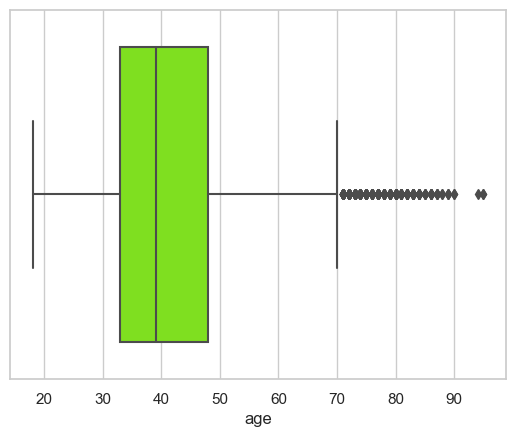

In [47]:
#Outlier Detuction using Box Plot for Age Column
sns.set(style="whitegrid")
sns.boxplot(x=df['age'], color='Chartreuse')

 # IQR - Interquartile Range

It stands for Interquartile Range, which is a measure of variability or spread of a dataset. It is calculated as the difference between the third quartile (75th percentile) and the first quartile (25th percentile) of the data.

In [48]:
#detecting Outlier for Age column
q1,q3=np.percentile(df["age"],[25,75])
IQR=q3-q1
upper=q3+1.5*IQR
lower=q1-1.5*IQR
print("Upper age bound:",upper,"Lower age bound :", lower)

Upper age bound: 70.5 Lower age bound : 10.5


In [ ]:
Removing outlier for Age

In [50]:
df.age.describe()

count    43354.000000
mean        40.720810
std         10.311878
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         70.500000
Name: age, dtype: float64

# Checking- After outlier removal

<Axes: xlabel='age'>

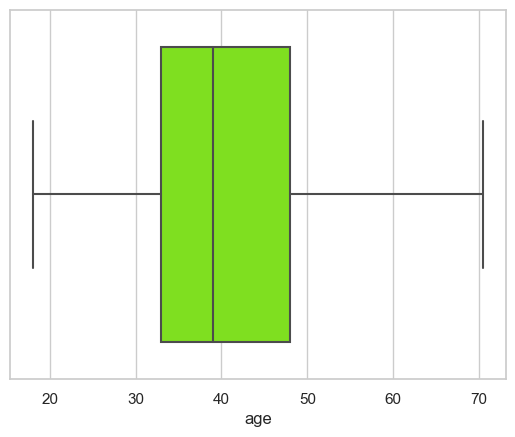

In [51]:
sns.set(style="whitegrid")
sns.boxplot(x=df['age'], color='Chartreuse')

# Day

Box Plot 
A boxplot is a standardized way of displaying the dataset based on the five-number summary: the minimum, the maximum, the sample median, and the first and third quartiles. Minimum (Q0 or 0th percentile): the lowest data point in the data set excluding any outliers.

<Axes: xlabel='day'>

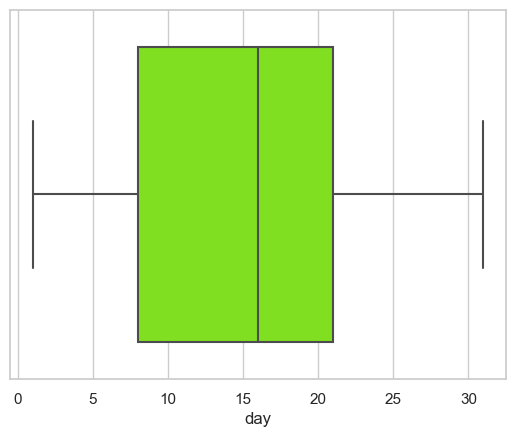

In [52]:
#Outlier Detuction using Box Plot for day Column
sns.set(style="whitegrid")
sns.boxplot(x=df['day'], color='Chartreuse')

 # IQR -  Interquartile Range in Day 

In [53]:
#detecting Outlier for Age column
q1,q3=np.percentile(df["day"],[25,75])
IQR=q3-q1
upper=q3+1.5*IQR
lower=q1-1.5*IQR
print("Upper bound:",upper,"Lower bound :", lower)

Upper bound: 40.5 Lower bound : -11.5


In [54]:
df.day.describe()

count    43354.000000
mean        15.806223
std          8.306493
min          1.000000
25%          8.000000
50%         16.000000
75%         21.000000
max         31.000000
Name: day, dtype: float64

Duration 
Duration visualization refers to the representation of time-related data in a visual format to help people understand and analyze patterns, trends, and relationships

# Box Plot

<Axes: >

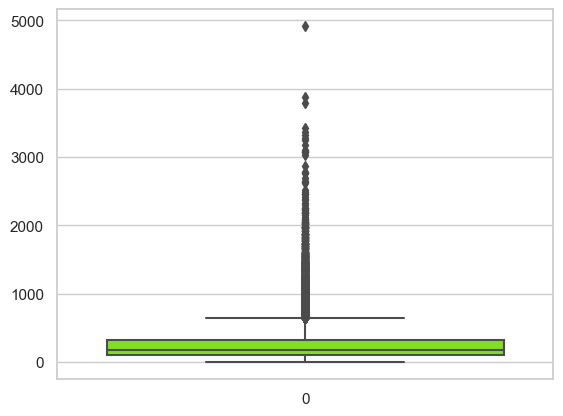

In [56]:
# Outlier Detuction using Box Plot for duration Column
sns.set(style="whitegrid")
sns.boxplot(df['dur'], color='Chartreuse')

# IQR - Interquartile Range in duration 

In [57]:
#detecting Outlier for Duration column
q1,q3=np.percentile(df["dur"],[25,75])
IQR=q3-q1
upper=q3+1.5*IQR
lower=q1-1.5*IQR
print("Upper bound:",upper,"Lower bound :", lower)

Upper bound: 640.5 Lower bound : -219.5


# Removing Outlier for duration column

In [ ]:
#removing outlier for duration column
# Clip/ Strip is used to detuct value to lower & upper threshold.
df.dur = df.dur.clip(-219.5,640.5)

In [59]:
df.dur.describe()

count    43354.000000
mean       234.682601
std        176.215856
min          0.000000
25%        103.000000
50%        180.000000
75%        318.000000
max        640.500000
Name: dur, dtype: float64

# Checking after outlier removal

<Axes: >

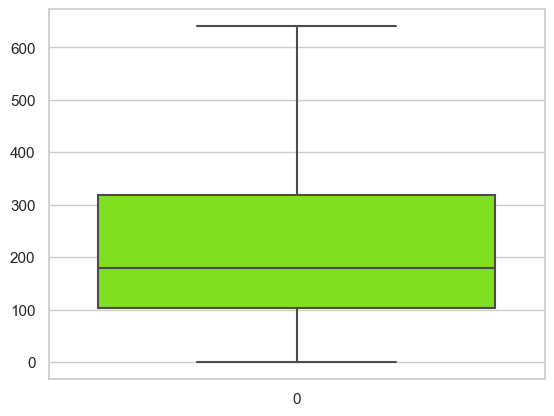

In [60]:
sns.set(style="whitegrid")
sns.boxplot(df['dur'], color='Chartreuse')

# No of calls 

<Axes: >

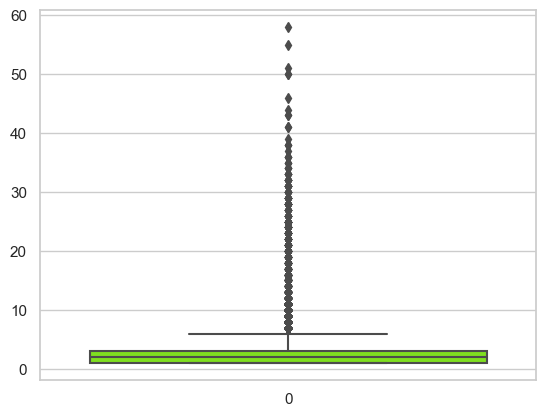

In [61]:
# Box Plot 
#checking for outlier using boxplot fot the column no of calls
sns.set(style="whitegrid")
sns.boxplot(df['num_calls'], color='Chartreuse')

# IQR - Interquartile Range

In [62]:
#IQR - Interquartile Range
#detecting Outlier for number of calls column

q1,q3=np.percentile(df["num_calls"],[25,75])
IQR=q3-q1
upper=q3+1.5*IQR
lower=q1-1.5*IQR
print("Upper bound:",upper,"Lower bound :", lower)

Upper bound: 6.0 Lower bound : -2.0


In [ ]:
#removing outlier for num_calls column
# Clip/ Strip is used to detuct value to lower & upper threshold.
df.num_calls = df.num_calls.clip(-2,6.0)

In [63]:
df.num_calls.describe()

count    43354.000000
mean         2.760184
std          3.065496
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         58.000000
Name: num_calls, dtype: float64

<Axes: >

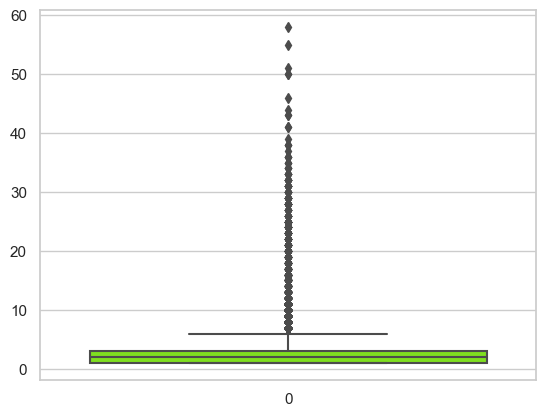

In [64]:
#Checking after outlier removal
sns.set(style="whitegrid")
sns.boxplot(df['num_calls'], color='Chartreuse')

 we detucted and removed outlier for all numerical columns. So we are done with Data Cleaning Process.



# EDA - Exploratory Data Analysis

Exploratory Data Analysis (EDA) is a crucial step in the machine learning process, as it helps you understand and visualize your data before building predictive models. In Python, there are several libraries and tools that can assist with EDA and machine learning. 

In [ ]:
# Distribution of Feature and Target variable

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
#lets check whether linear relationship exists between numeric fetures and target using pearson correlation coeff
plt.figure(figsize=(10,10))


<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

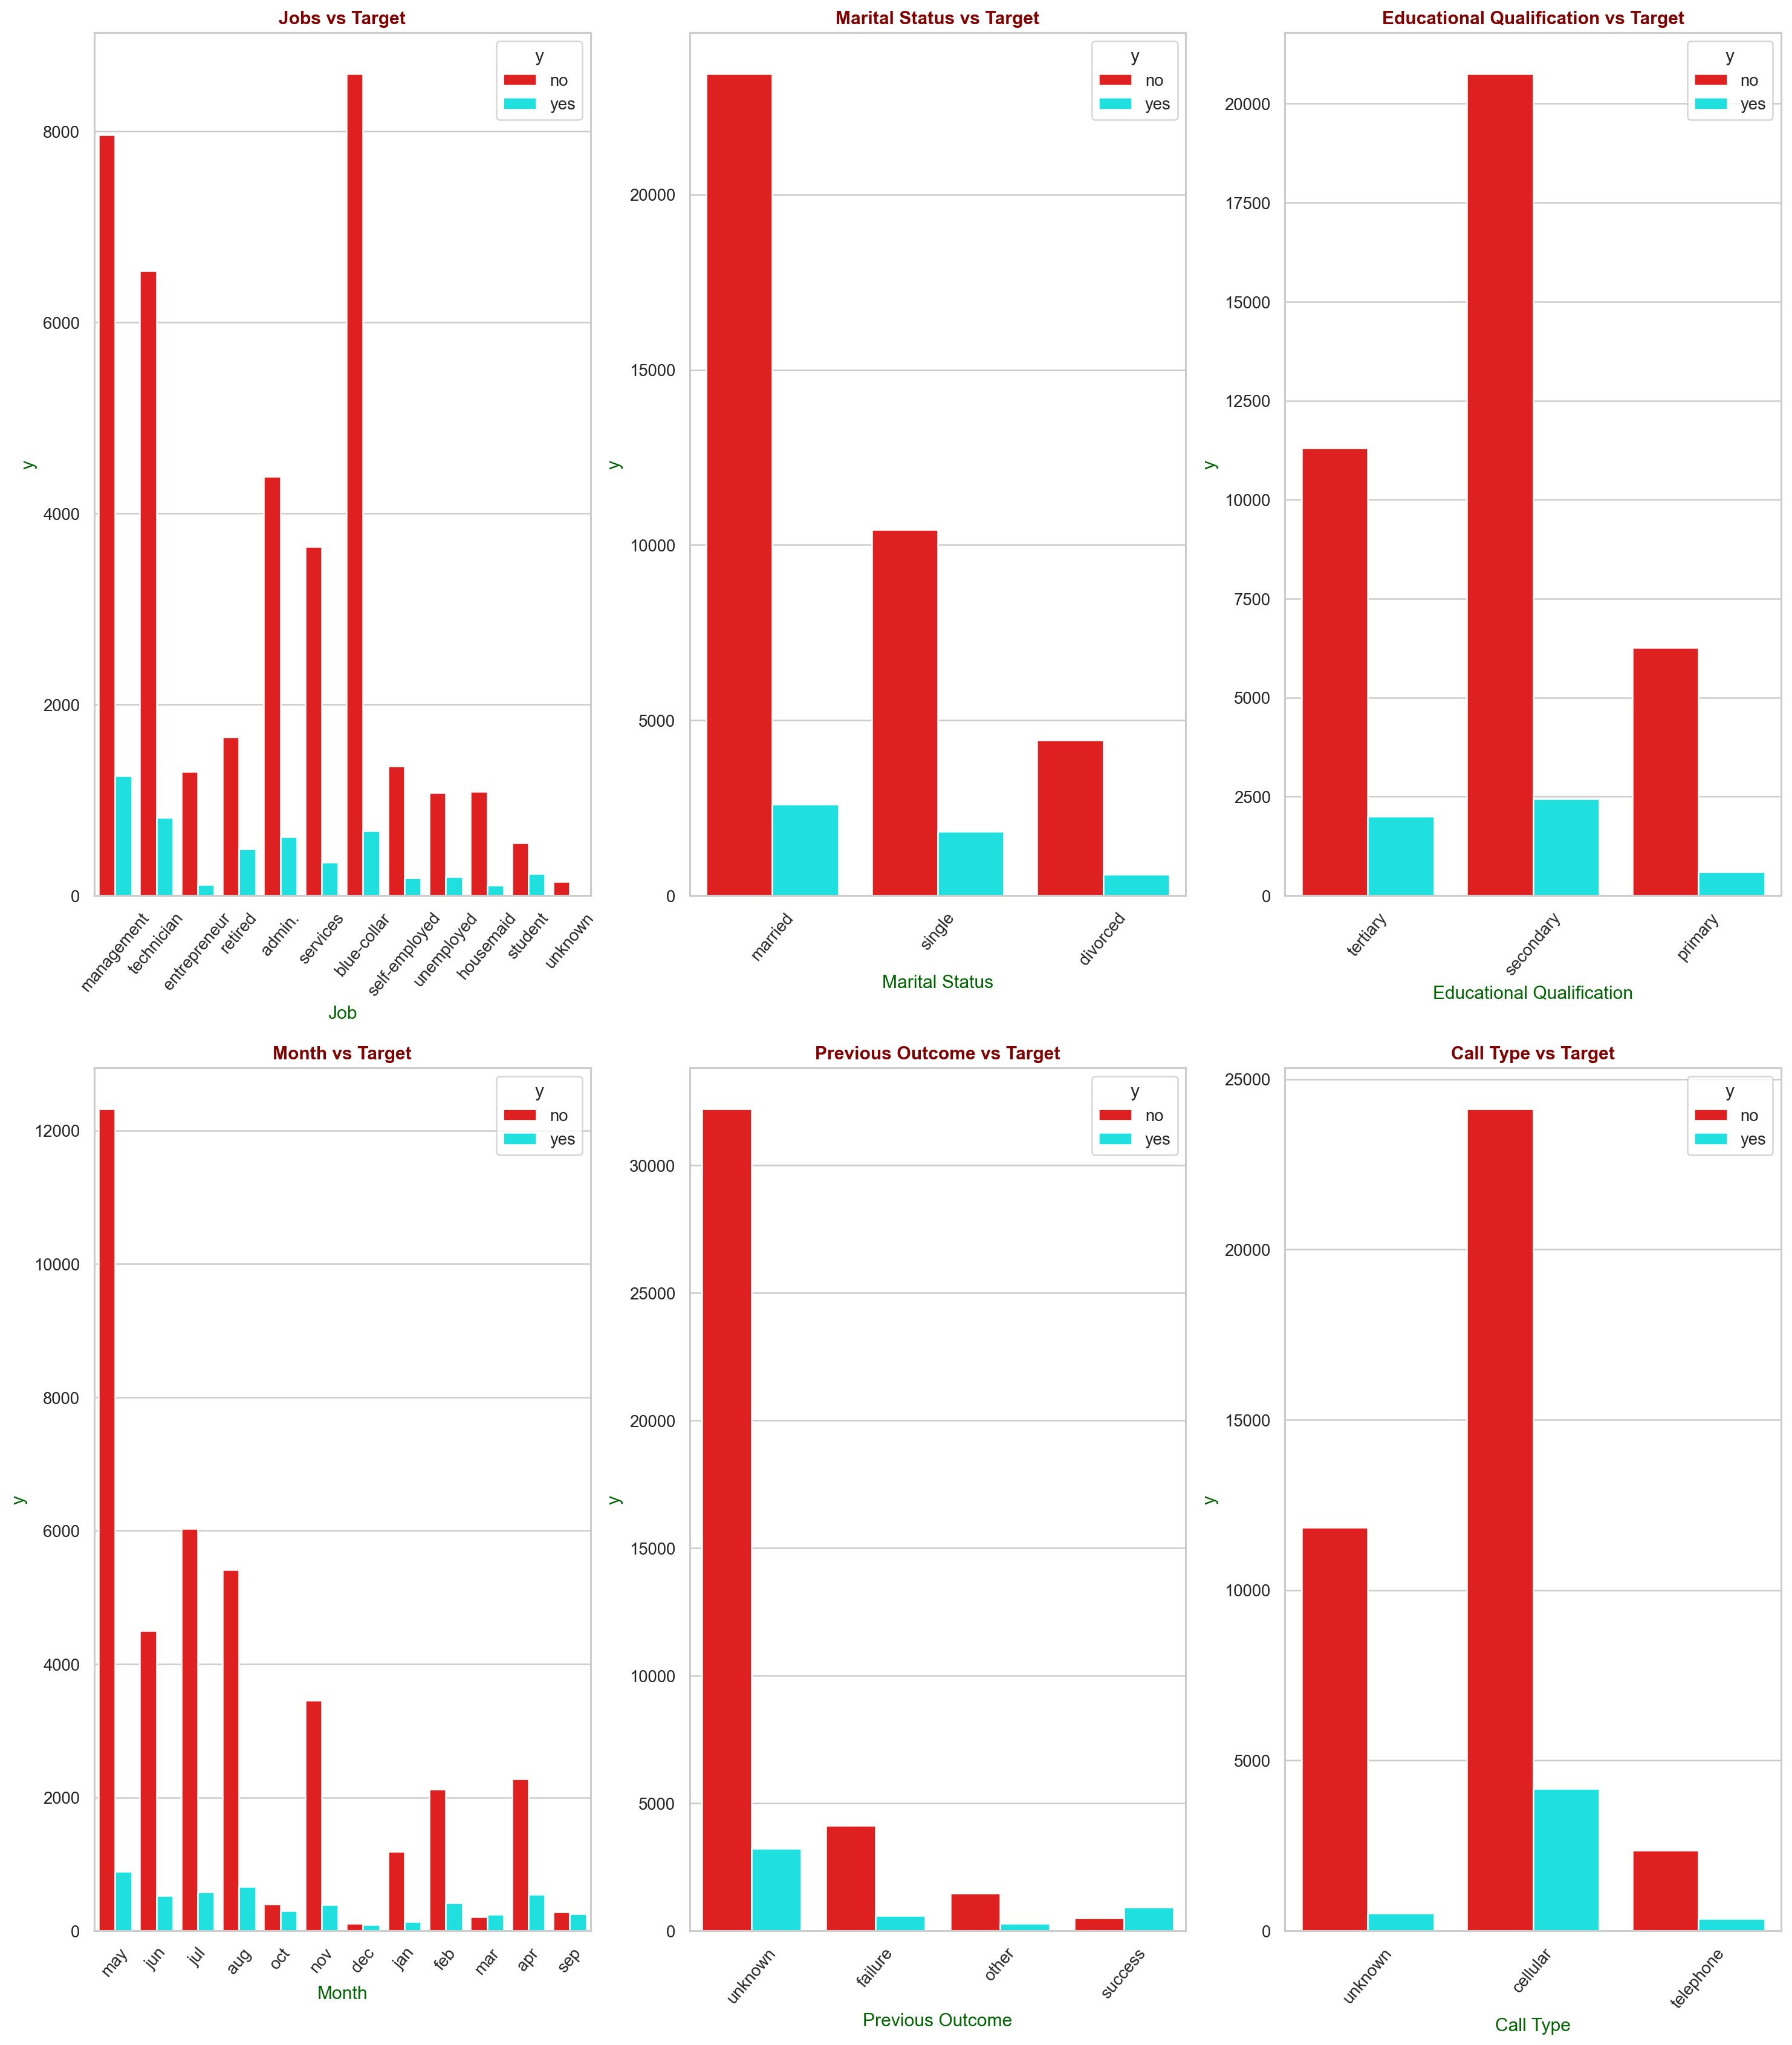

In [72]:
plt.figure(figsize=(20,35), dpi=180)
#plt.suptitle("Categorical Data Vs Target", fontsize=20, fontweight='bold', color='maroon')
#Jobs vs Target
plt.subplot(3,3,1)
my_colors = ['Red', 'cyan']
sns.countplot(x='job',hue='y',data=df, palette=my_colors)
plt.xticks(rotation=50)
plt.title('Jobs vs Target', fontweight='bold', color='maroon')
plt.xlabel('Job', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')

#Marital Status vs Target
plt.subplot(3,3,2)
my_colors = ['Red', 'cyan']
sns.countplot(x='marital',hue='y',data=df, palette=my_colors)
plt.xticks(rotation=50)
plt.title('Marital Status vs Target', fontweight='bold', color='maroon')
plt.xlabel('Marital Status', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')

#Educational Qualification vs Target
plt.subplot(3,3,3)
my_colors = ['Red', 'cyan']
sns.countplot(x='education_qual',hue='y',data=df, palette=my_colors)
plt.xticks(rotation=50)
plt.title('Educational Qualification vs Target', fontweight='bold', color='maroon')
plt.xlabel('Educational Qualification', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')

#Month vs Target
plt.subplot(3,3,4)
my_colors = ['Red', 'cyan']
sns.countplot(x='mon',hue='y',data=df, palette=my_colors)
plt.xticks(rotation=50)
plt.title('Month vs Target', fontweight='bold', color='maroon' )
plt.xlabel('Month', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')

#Previous Outcome vs Target
plt.subplot(3,3,5)
my_colors = ['Red', 'cyan']
sns.countplot(x='prev_outcome',hue='y',data=df, palette=my_colors)
plt.xticks(rotation=50)
plt.title('Previous Outcome vs Target', fontweight='bold', color='maroon' )
plt.xlabel('Previous Outcome', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')

#Call Type vs Target
plt.subplot(3,3,6)
my_colors = ['Red', 'cyan']
sns.countplot(x='call_type',hue='y',data=df, palette=my_colors)
plt.xticks(rotation=50)
plt.title('Call Type vs Target', fontweight='bold', color='maroon')
plt.xlabel('Call Type', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')

plt.show()


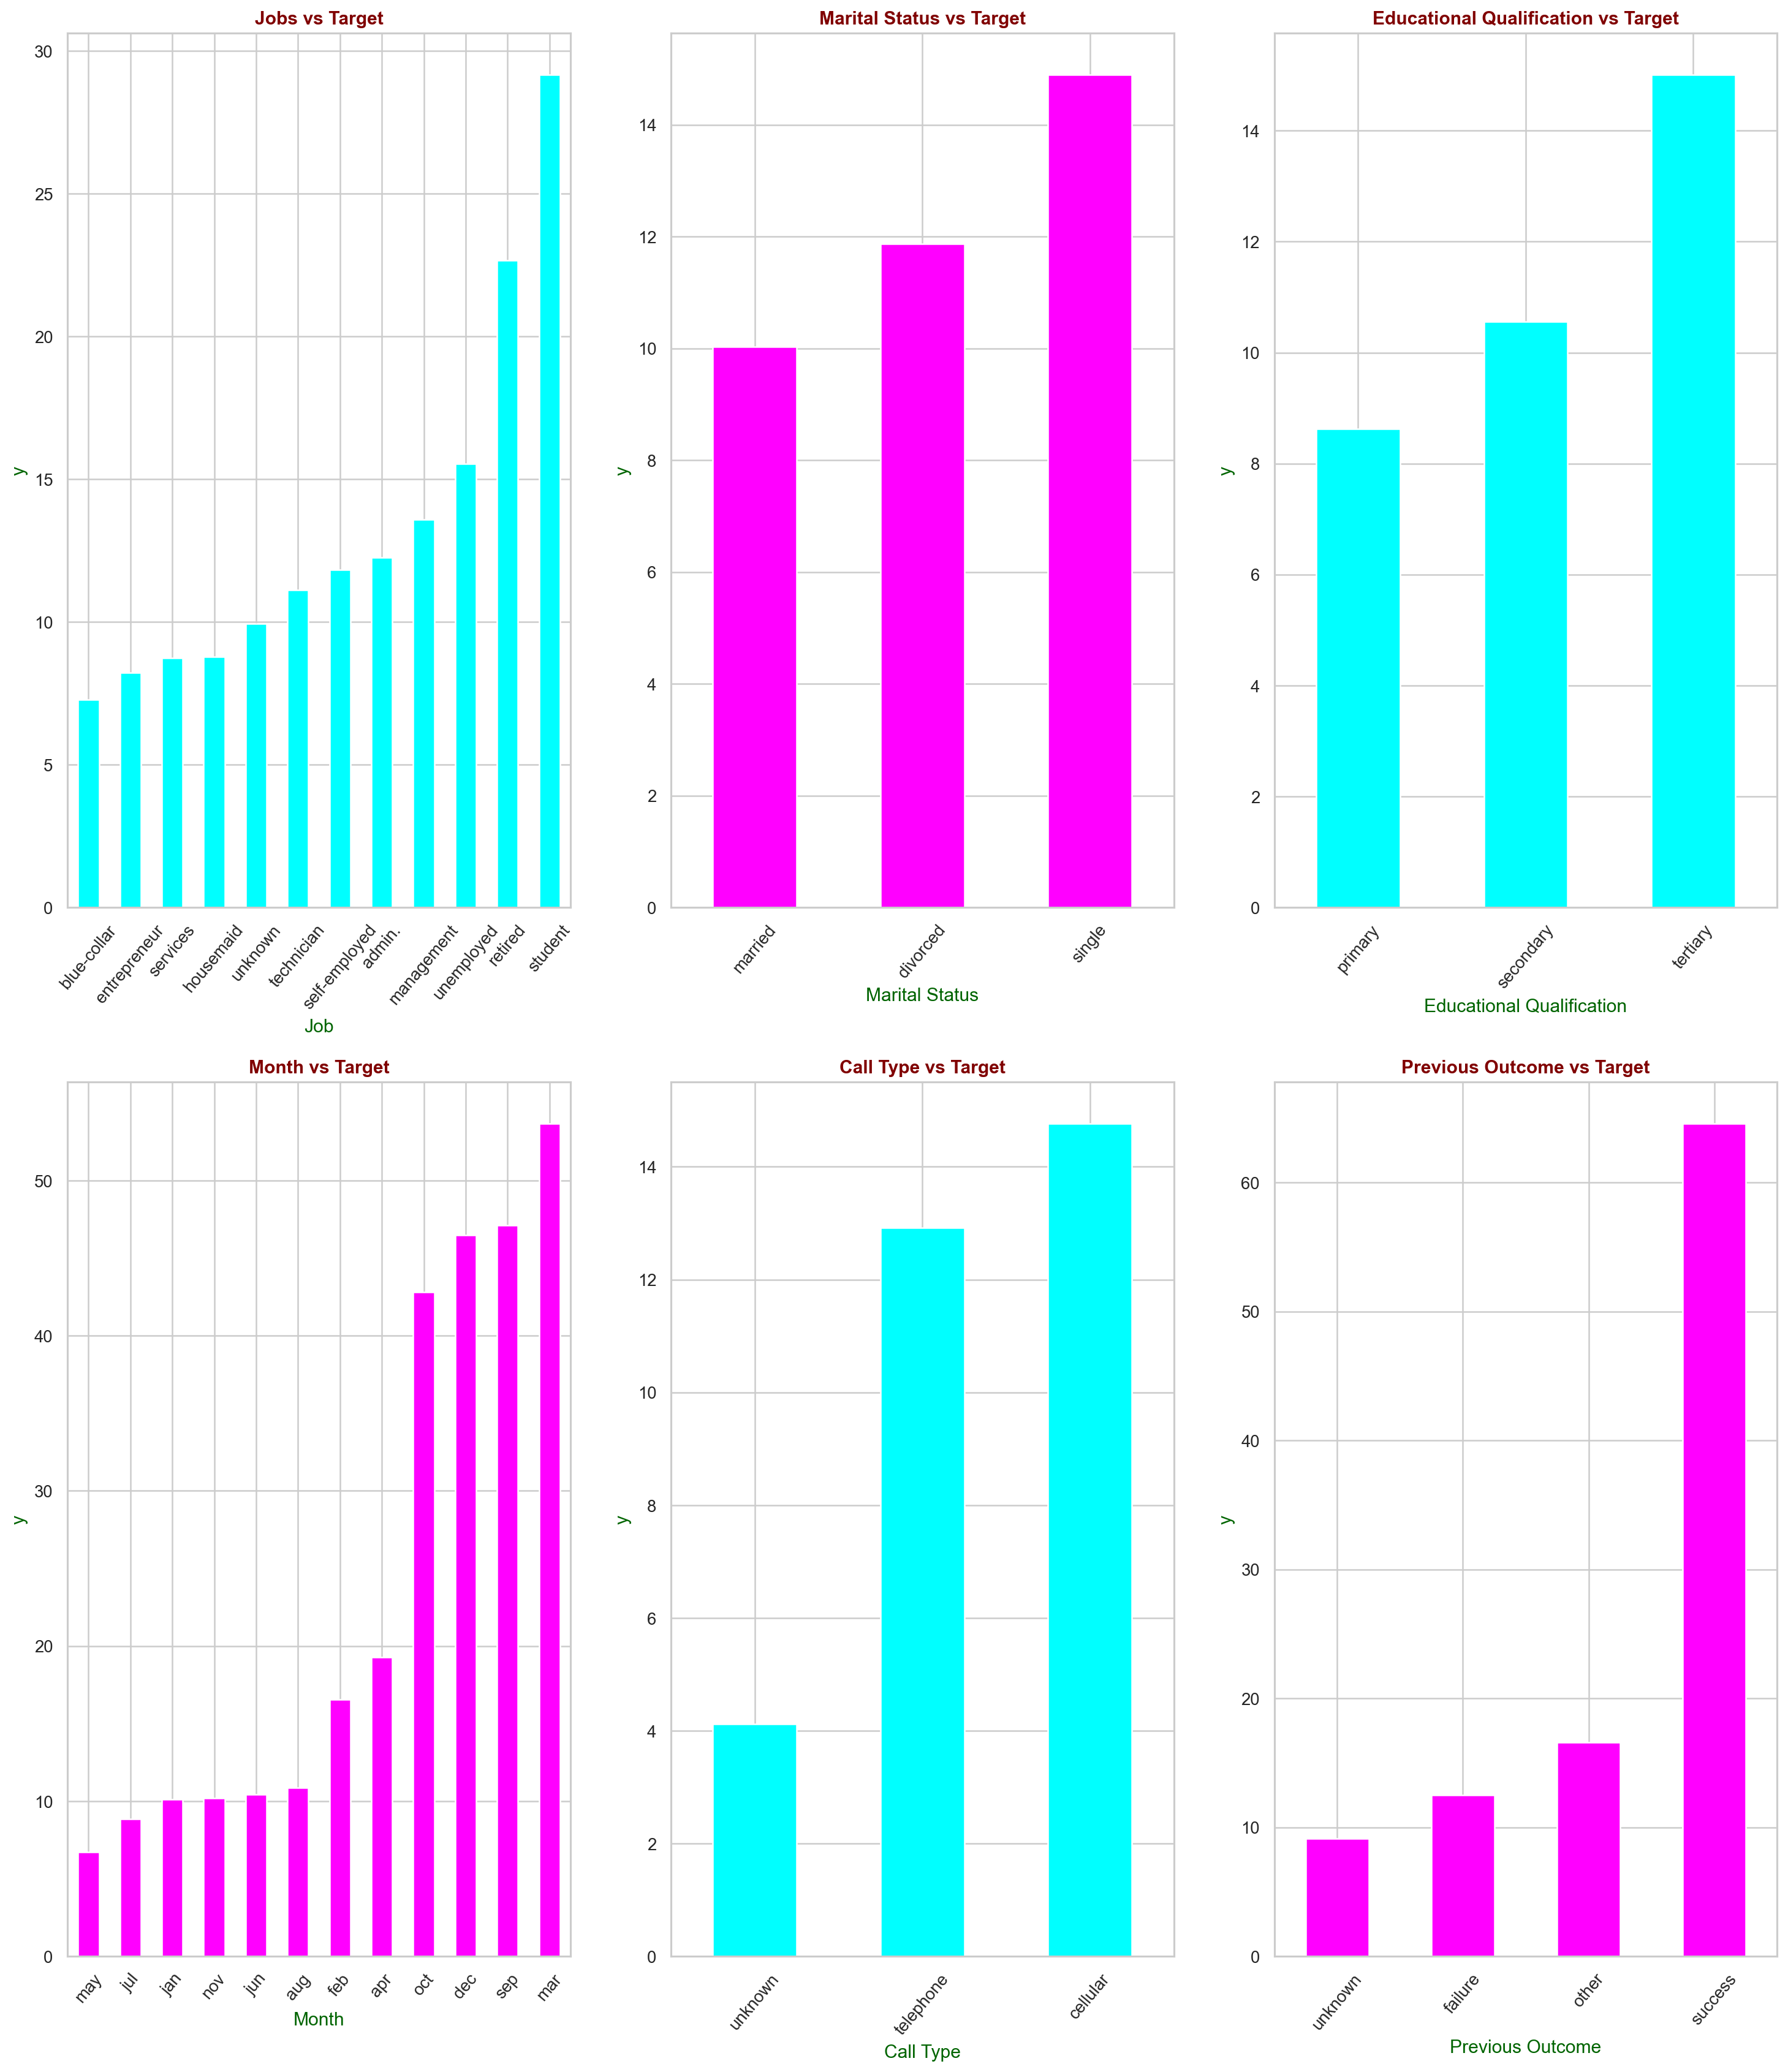

In [73]:
plt.figure(figsize=(20,35), dpi=180)
#plt.suptitle("Categorical Data Vs Target", fontsize=20, fontweight='bold', color='maroon')

#Jobs vs Target
plt.subplot(3,3,1)
(df.groupby('job')['target'].mean()*100).sort_values().plot(kind="bar",color='cyan')
plt.xticks(rotation=50)
plt.title('Jobs vs Target', fontweight='bold', color='maroon')
plt.xlabel('Job', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')

#Marital Status vs Target
plt.subplot(3,3,2)
(df.groupby('marital')['target'].mean()*100).sort_values().plot(kind="bar",color='Magenta')
plt.xticks(rotation=50)
plt.title('Marital Status vs Target', fontweight='bold', color='maroon')
plt.xlabel('Marital Status', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')

#Educational Qualification vs Target
plt.subplot(3,3,3)
(df.groupby('education_qual')['target'].mean()*100).sort_values().plot(kind="bar",color='cyan')
plt.xticks(rotation=50)
plt.title('Educational Qualification vs Target', fontweight='bold', color='maroon')
plt.xlabel('Educational Qualification', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')

#Month vs Target
plt.subplot(3,3,4)
(df.groupby('mon')['target'].mean()*100).sort_values().plot(kind="bar",color='Magenta')
plt.xticks(rotation=50)
plt.title('Month vs Target', fontweight='bold', color='maroon' )
plt.xlabel('Month', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')

#Call Type vs Target
plt.subplot(3,3,5)
(df.groupby('call_type')['target'].mean()*100).sort_values().plot(kind="bar",color='cyan')
plt.xticks(rotation=50)
plt.title('Call Type vs Target', fontweight='bold', color='maroon')
plt.xlabel('Call Type', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')

#Previous Outcome vs Target
plt.subplot(3,3,6)
(df.groupby('prev_outcome')['target'].mean()*100).sort_values().plot(kind="bar",color='Magenta')
plt.xticks(rotation=50)
plt.title('Previous Outcome vs Target', fontweight='bold', color='maroon')
plt.xlabel('Previous Outcome', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')


plt.show()

In [ ]:
Percentage of people Subscribed -- Categorical Data Vs Target (Categorical)
Jobs vs Target

Most subscribed % : Student, retired
Least Subscribed % : blue-collar
Marital Status vs Target

Most subscribed % : Single
Least Subscribed % : Married
Educational Qualification vs Target

Most subscribed % : teritary
Least Subscribed % : primary
Month vs Target

Most subscribed % : March, September
Least Subscribed % : May
Call Type vs Target

Most subscribed % : Cellular
Least Subscribed % : unknown
Previous Outcome vs Target

Most subscribed % : Success
Least Subscribed % : unknown

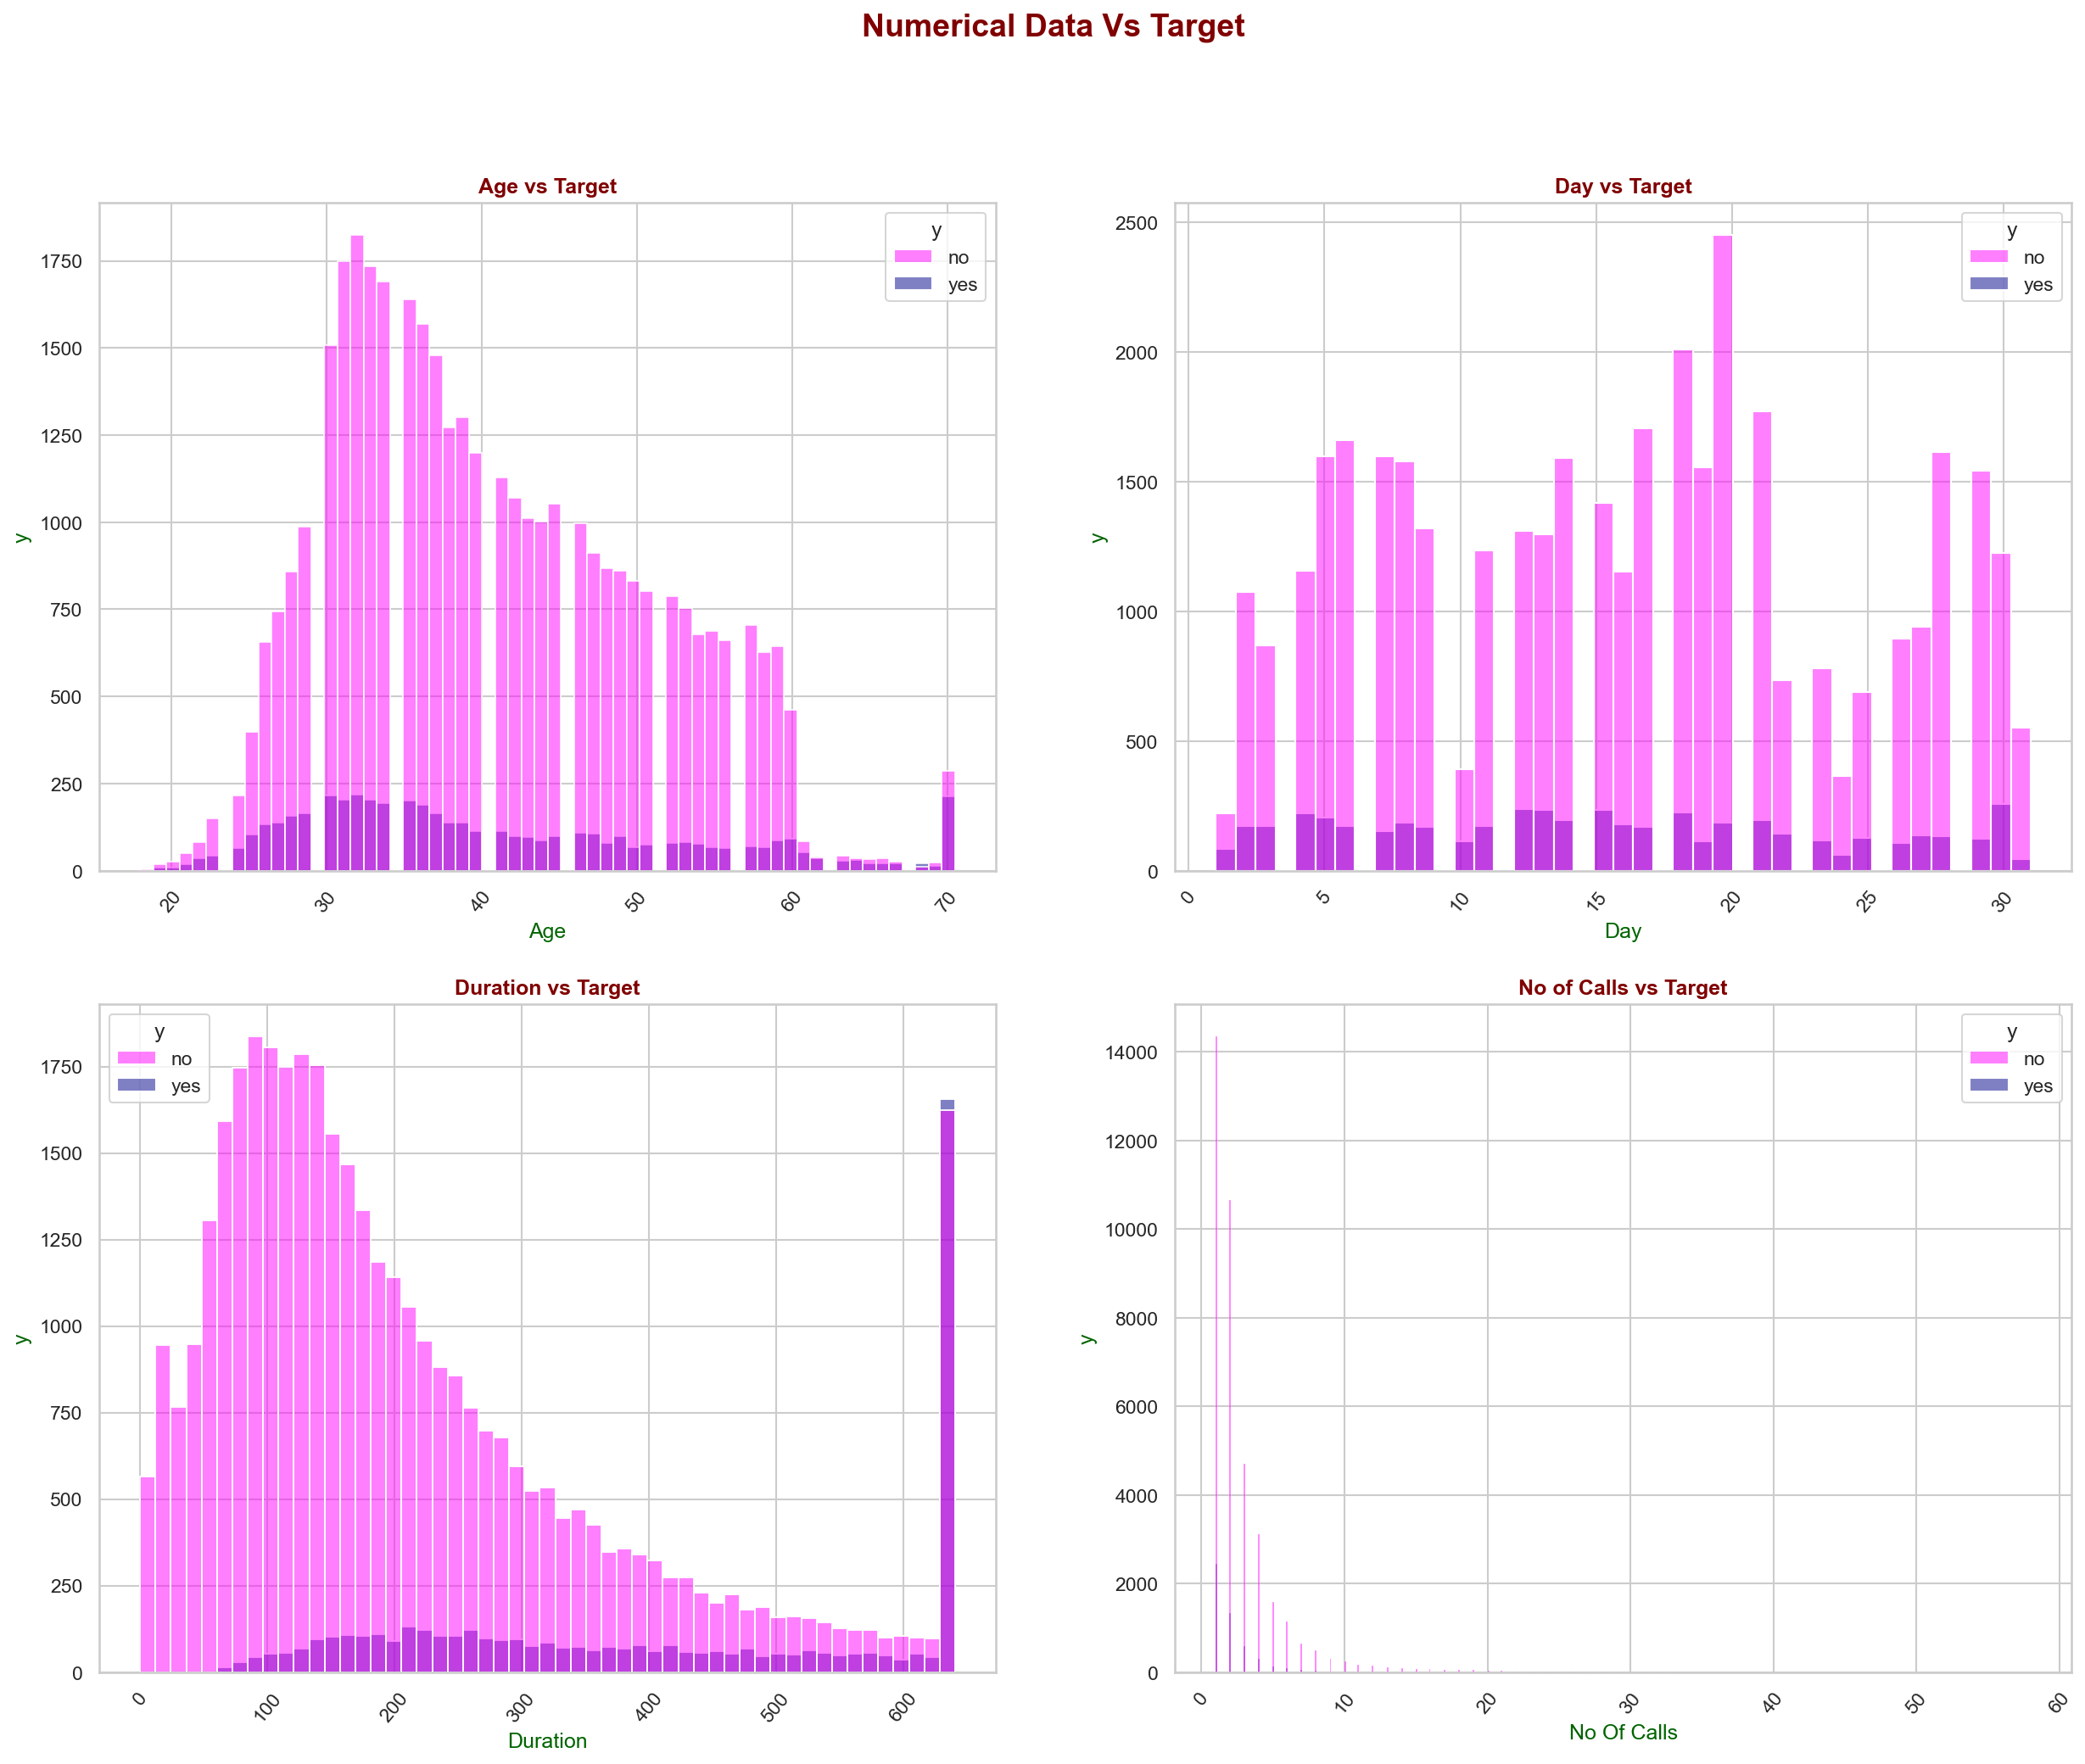

In [74]:
plt.figure(figsize=(20, 15), dpi=150)
#sub title to show title for overall plot 
plt.suptitle("Numerical Data Vs Target", fontsize=18,  fontweight='bold', color='maroon') 

#Age vs Target
plt.subplot(2,2,1)
my_colors = ['Magenta', 'DarkBlue']
sns.histplot(x='age',hue='y',data=df, palette=my_colors)
plt.xticks(rotation=50)
plt.title('Age vs Target', fontweight='bold', color='maroon' )
plt.xlabel('Age', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')
#df[['age','target']].corr()

#Day vs Target
plt.subplot(2,2,2)
my_colors = ['Magenta', 'DarkBlue']
sns.histplot(x='day',hue='y',data=df, palette=my_colors)
plt.xticks(rotation=50)
plt.title('Day vs Target', fontweight='bold', color='maroon' )
plt.xlabel('Day', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')
#df[['day','target']].corr()

#Duration vs Target
plt.subplot(2,2,3)
my_colors = ['Magenta', 'DarkBlue']
sns.histplot(x='dur',hue='y',data=df, palette=my_colors)
plt.xticks(rotation=50)
plt.title('Duration vs Target', fontweight='bold', color='maroon' )
plt.xlabel('Duration', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')

#No of Calls vs Target
plt.subplot(2,2,4)
my_colors = ['Magenta', 'DarkBlue']
sns.histplot(x='num_calls',hue='y',data=df, palette=my_colors)
plt.xticks(rotation=50)
plt.title('No of Calls vs Target', fontweight='bold', color='maroon' )
plt.xlabel('No Of Calls', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')

plt.show()

In [ ]:
Numeric Data vs Target
Age vs Target

Target : Middle age people
Subscribed : Middle age people
Day vs Target

Target : Middle of Month
Subscribed : Middle of Month
Duration vs Target

Duration of call is also important to subscribe for insurance.
No of Calls vs Target

No of calls increase subscrition also getting increase.


In [ ]:
Encoding
In this project i am going to use decision tree so we muct do label encoding.

In [75]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y', 'target'],
      dtype='object')

In [76]:
# job
#Encoding for job column (Label Encoding)

df['job']=df['job'].map({'blue-collar':1,'entrepreneur':2,'services':3,'housemaid':4,'technician':5,'self-employed':6,'admin.':7,'management':8, 'unemployed':9, 'retired': 10, 'student' : 11})   
df.head(3)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58.0,8.0,married,tertiary,unknown,5,may,261.0,1,unknown,no,0
1,44.0,5.0,single,secondary,unknown,5,may,151.0,1,unknown,no,0
2,33.0,2.0,married,secondary,unknown,5,may,76.0,1,unknown,no,0


In [77]:
# Marital status 
#Encoding for Marital status (Label Encoding)
df['marital'] =df['marital'].map({'married': 1, 'divorced': 2, 'single' : 3})
df.head(3)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58.0,8.0,1,tertiary,unknown,5,may,261.0,1,unknown,no,0
1,44.0,5.0,3,secondary,unknown,5,may,151.0,1,unknown,no,0
2,33.0,2.0,1,secondary,unknown,5,may,76.0,1,unknown,no,0


In [ ]:
Educational Qualification


In [78]:
#encoding for educational qualification (Label Encoding)
df['education_qual'] = df['education_qual'].map({'primary': 1, 'secondary': 2, 'tertiary' :3})
df.head(3)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58.0,8.0,1,3,unknown,5,may,261.0,1,unknown,no,0
1,44.0,5.0,3,2,unknown,5,may,151.0,1,unknown,no,0
2,33.0,2.0,1,2,unknown,5,may,76.0,1,unknown,no,0


In [ ]:
Month


In [79]:
# Encoding for month column (Label Encoding)
df['mon']=df['mon'].map({'may': 1, 'jul' : 2, 'jan': 3, 'nov': 4, 'jun' : 5, 'aug' : 6, 'feb' : 7, 'apr' : 8, 'oct' : 9, 'dec' : 10 , 'sep': 11, 'mar': 12})
df.head(3)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58.0,8.0,1,3,unknown,5,1,261.0,1,unknown,no,0
1,44.0,5.0,3,2,unknown,5,1,151.0,1,unknown,no,0
2,33.0,2.0,1,2,unknown,5,1,76.0,1,unknown,no,0


In [80]:
# Call Type
# Encoding for call type column (Label Encoding)
df['call_type'] = df['call_type'].map({'unknown': 1, 'telephone' : 2, 'cellular' : 3})
df.head(3)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58.0,8.0,1,3,1,5,1,261.0,1,unknown,no,0
1,44.0,5.0,3,2,1,5,1,151.0,1,unknown,no,0
2,33.0,2.0,1,2,1,5,1,76.0,1,unknown,no,0


In [81]:
# Previous Outcome
# Encoding for previous outcome column (Label Encoding)
df['prev_outcome']=df['prev_outcome'].map({'unknown' : 1, 'failure' : 2, 'other' : 3, 'success': 4})
df.head(3)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58.0,8.0,1,3,1,5,1,261.0,1,1,no,0
1,44.0,5.0,3,2,1,5,1,151.0,1,1,no,0
2,33.0,2.0,1,2,1,5,1,76.0,1,1,no,0


In [82]:
# Feature and Target Selection
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y', 'target'],
      dtype='object')

In [83]:
# X --> Feature y-- > Target

x = df[['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon', 'dur', 'num_calls', 'prev_outcome']].values
y=df['target'].values

# Spliting -
 Data splitting is when data is divided into two or more subsets. Typically, with a two-part split, one part is used to evaluate or test the data and the other to train the model.

In [84]:
# splitting the data as train and test

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state = 3 )


# Scaling  

 scaling is a data preprocessing technique used to transform the values of features or variables in a dataset to a similar scale.

In [3]:
! pip install sklearn

In [ ]:
#scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_smt)
x_test_scaled = scaler.transform(x_test)

 # Modeling 
 
 Modeling in data science refers to the process of creating mathematical or computational representations of real-world phenomena, typically for the purpose of making predictions, gaining insights, or solving complex problems.

# Regression 

Regression modeling is a statistical technique used to analyze the relationship between a dependent variable and one or more independent variables. It is used to predict the value of the dependent variable based on the values of the independent variables.

# Logistic Regression

Logistic regression modeling is a statistical method used to analyze and model the relationship between a binary dependent variable and one or more independent variables. It is commonly used in predictive modeling and is particularly useful for analyzing data where the outcome variable is dichotomous or binary, such as yes/no or true/false.

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression()


In [3]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)  
rf_model.fit(X_train, y_train)  
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)



NameError: name 'X_train' is not defined

# ! pip install imblearn

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

# Generate synthetic data for demonstration
X_smote, y_smote = make_classification(n_samples=100, n_features=20, random_state=42)
X_test, y_test = make_classification(n_samples=200, n_features=20, random_state=42)

# Create and fit the Logistic Regression model
lr = LogisticRegression()
lr.fit(X_smote, y_smote)

# Make predictions
y_pred_lr_1 = lr.predict(X_test)

# Display the predictions
y_pred_lr_1



array([1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1])

In [ ]:
from sklearn.metrics import f1_score, roc_auc_score

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler

# Replace this with your actual data loading code
def load_train_data():
  x_train = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
  y_train = [0, 1, 0]
  return x_train, y_train

def load_test_data():
  x_test = [[10, 11, 12], [13, 14, 15], [16, 17, 18]]
  y_test = [1, 0, 1]
  return x_test, y_test

# Load or generate your training and testing data
x_train, y_train = load_train_data()
x_test, y_test = load_test_data()

# Perform feature scaling using StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Create and fit the Logistic Regression model
lr = LogisticRegression()
lr.fit(x_train_scaled, y_train)

# Calculate the accuracy on the test set
accuracy = lr.score(x_test_scaled, y_test)

# Calculate the ROC AUC score
y_pred = lr.predict_proba(x_test_scaled)[:, 1] # Probability of the positive class

roc_auc = roc_auc_score(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy}")
print(f"ROC AUC Score: {roc_auc}")



Accuracy: 0.3333333333333333
ROC AUC Score: 0.5


# K-Nearest Neighbour (KNN)

K-Nearest Neighbours is one of the most basic yet essential classification algorithms in Machine Learning. It belongs to the supervised learning domain and finds intense application in pattern recognition, data mining, and intrusion detection.


In [ ]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import cross_val_score 
for i in [1,2,3,4,5,6,7,8,9,10,20,30,40,50]: 
  knn= KNeighborsClassifier(i)
  knn.fit(x_train_scaled, y_train_smt) 
  print("K value :", i, "Train Score : ", knn.score(x_train_scaled,y_train_smt), "Cross Value Accuracy :" , np.mean(cross_val_score(knn, x_test_scaled, y_test, cv=10)))

In [ ]:
K value : 1 Train Score :  1.0 Cross Value Accuracy : 0.8681404499806875
K value : 2 Train Score :  0.9947228549734245 Cross Value Accuracy : 0.8886319256684262
K value : 3 Train Score :  0.9770880789673501 Cross Value Accuracy : 0.8843495182610189
K value : 4 Train Score :  0.9765945330296127 Cross Value Accuracy : 0.8929150036479122
K value : 5 Train Score :  0.9668754745634016 Cross Value Accuracy : 0.8907159295738379
K value : 6 Train Score :  0.9671791951404708 Cross Value Accuracy : 0.8934939755804472
K value : 7 Train Score :  0.9609149582384207 Cross Value Accuracy : 0.8929158083344062
K value : 8 Train Score :  0.9604403948367501 Cross Value Accuracy : 0.8941881517960603
K value : 9 Train Score :  0.9561123766135156 Cross Value Accuracy : 0.8940721428264882
K value : 10 Train Score :  0.9554669703872437 Cross Value Accuracy : 0.8953458274322991
K value : 20 Train Score :  0.9363325740318906 Cross Value Accuracy : 0.8941881517960603
K value : 30 Train Score :  0.9307137433561123 Cross Value Accuracy : 0.8927984582206772
K value : 40 Train Score :  0.9268413059984814 Cross Value Accuracy : 0.8926831198231835
K value : 50 Train Score :  0.9241078208048595 Cross Value Accuracy : 0.8924513701128707

#  k=10 is a good cross validation accuracy of#  0.895

In [ ]:
knn= KNeighborsClassifier(i)
knn.fit(x_train_scaled, y_train_smt)
print("KNN Score: ",knn.score(x_test_scaled,y_test)) 
print( "AUROC on the sampled dataset : ",roc_auc_score( y_test, knn.predict_proba(x_test)[:, 1]))
     

In [ ]:
KNN Score:  0.7961333642046771
AUROC on the sampled dataset :  0.5286880630074354

# Decision Tree


A Decision Tree is a popular machine learning algorithm used for both classification and regression tasks. It is a supervised learning algorithm that can be used for tasks such as predicting the class labels of instances (classification) or predicting a continuous value (regression).

In [ ]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import roc_auc_score

In [ ]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import roc_auc_score 
dt = DecisionTreeClassifier() 
dt.fit(x_train_smt,y_train_smt) 
print("Decision Tree Score : ", dt.score(x_train_smt,y_train_smt)) 
print( "AUROC on the sampled dataset : ",roc_auc_score( y_test, dt.predict_proba(x_test)[:, 1]))

In [ ]:
Decision Tree Score :  1.0
AUROC on the sampled dataset :  0.786208495439298

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score #this will help me to do cross- validation
import numpy as np

for depth in [1,2,3,4,5,6,7,8,9,10,20]:
  dt = DecisionTreeClassifier(max_depth=depth) # will tell the DT to not grow past the given threhsold
  # Fit dt to the training set
  dt.fit(x_train_smt, y_train_smt) # the model is trained
  trainAccuracy = accuracy_score(y_train_smt, dt.predict(x_train_smt)) # this is useless information - i am showing to prove a point
  dt = DecisionTreeClassifier(max_depth=depth) # a fresh model which is not trained yet
  valAccuracy = cross_val_score(dt, x_test_scaled, y_test, cv=10) # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))

In [ ]:
Depth  :  1  Training Accuracy :  0.7816059225512528  Cross val score :  0.8850428897901377
Depth  :  2  Training Accuracy :  0.8336180713743356  Cross val score :  0.8936105210076821
Depth  :  3  Training Accuracy :  0.8693432042520881  Cross val score :  0.895462775202781
Depth  :  4  Training Accuracy :  0.8866552771450266  Cross val score :  0.8953474368052874
Depth  :  5  Training Accuracy :  0.9176917236142749  Cross val score :  0.8967365939230078
Depth  :  6  Training Accuracy :  0.9287585421412301  Cross val score :  0.8949987393244927
Depth  :  7  Training Accuracy :  0.9372247532270311  Cross val score :  0.8938411978026695
Depth  :  8  Training Accuracy :  0.9470577069096431  Cross val score :  0.8916417213853481
Depth  :  9  Training Accuracy :  0.9549924069855733  Cross val score :  0.8903683050083687
Depth  :  10  Training Accuracy :  0.9634396355353075  Cross val score :  0.8906007252907602
Depth  :  20  Training Accuracy :  0.9992027334851936  Cross val score :  0.8696454819535642

# k= 5 is the good cross validation score of 0.896

In [ ]:
dt = DecisionTreeClassifier(max_depth=5) 
dt.fit(x_train_smt,y_train_smt) 
print("Decision Tree Score : ", dt.score(x_train_smt,y_train_smt)) 
print( "AUROC on the sampled dataset : ",roc_auc_score( y_test, dt.predict_proba(x_test)[:, 1]))

In [ ]:
Decision Tree Score :  0.9176917236142749
AUROC on the sampled dataset :  0.8662168205561889

# XG BOOST

XGBoost is an optimized distributed gradient boosting library designed for efficient and scalable training of machine learning models. It is an ensemble learning method that combines the predictions of multiple weak models to produce a stronger prediction.

In [ ]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score 
import numpy as np 
for lr in [0.01,0.02,0.03,0.04,0.05,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]: 
  model = xgb.XGBClassifier(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model 
  model.fit(x_train_smt,y_train_smt) #train the model 
  print("Learning rate : ", lr," Train score : ", model.score(x_train_smt,y_train_smt)," Cross-Val score : ", np.mean(cross_val_score(model, x_test, y_test, cv=10)))
     

In [ ]:
Learning rate :  0.01  Train score :  0.9434320425208808  Cross-Val score :  0.8970835479163984
Learning rate :  0.02  Train score :  0.9530182232346242  Cross-Val score :  0.896736325694176
Learning rate :  0.03  Train score :  0.9606112376613516  Cross-Val score :  0.898125214583065
Learning rate :  0.04  Train score :  0.9654707668944571  Cross-Val score :  0.8976619833912709
Learning rate :  0.05  Train score :  0.969457099468489  Cross-Val score :  0.8985883116604437
Learning rate :  0.1  Train score :  0.9788534548215642  Cross-Val score :  0.8975465108793614
Learning rate :  0.11  Train score :  0.9800493545937737  Cross-Val score :  0.8971990204283079
Learning rate :  0.12  Train score :  0.9805998481397115  Cross-Val score :  0.8996299783271103
Learning rate :  0.13  Train score :  0.9810174639331815  Cross-Val score :  0.8985892504613536
Learning rate :  0.14  Train score :  0.9815679574791192  Cross-Val score :  0.8981254828118965
Learning rate :  0.15  Train score :  0.9822892938496584  Cross-Val score :  0.8987040524011845
Learning rate :  0.2  Train score :  0.9843014426727411  Cross-Val score :  0.8997451826101885
Learning rate :  0.5  Train score :  0.9948557327258922  Cross-Val score :  0.897430636024205
Learning rate :  0.7  Train score :  0.9981397114654518  Cross-Val score :  0.8946516512166859
Learning rate :  1  Train score :  0.9997722095671981  Cross-Val score :  0.8868960827861464

# Learning Rate 0.2 is getting the best cross validation score of 0.899

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(max_depth=2,n_estimators=100,max_features="sqrt")    #max_depth=log(no of features)
rf.fit(x_train, y_train)
y_pred= rf.predict(x_test)

In [ ]:
#doing cross validation to get best value of max _depth to prevent overfitted model 
from sklearn.model_selection import cross_val_score 
from sklearn.ensemble import RandomForestClassifier
for depth in [1,2,3,4,5,6,7,8,9,10]:
  rf= RandomForestClassifier(max_depth=depth,n_estimators=100,max_features="sqrt")   # will tell the DT to not grow past the given threhsold
  # Fit dt to the training set
  rf.fit(x_train, y_train) # the model is trained
  rf= RandomForestClassifier(max_depth=depth,n_estimators=100,max_features="sqrt")   # a fresh model which is not trained yet
  valAccuracy = cross_val_score(rf, x_train, y_train, cv=10) # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))

In [ ]:
Depth  :  1  Training Accuracy :  0.9992027334851936  Cross val score :  0.8834119714385553
Depth  :  2  Training Accuracy :  0.9992027334851936  Cross val score :  0.8850039258997937
Depth  :  3  Training Accuracy :  0.9992027334851936  Cross val score :  0.8909374311291591
Depth  :  4  Training Accuracy :  0.9992027334851936  Cross val score :  0.8945555353511144
Depth  :  5  Training Accuracy :  0.9992027334851936  Cross val score :  0.897044689895815
Depth  :  6  Training Accuracy :  0.9992027334851936  Cross val score :  0.8990418290586975
Depth  :  7  Training Accuracy :  0.9992027334851936  Cross val score :  0.9024572110441387
Depth  :  8  Training Accuracy :  0.9992027334851936  Cross val score :  0.9046569802665925
Depth  :  9  Training Accuracy :  0.9992027334851936  Cross val score :  0.9038755209044738
Depth  :  10  Training Accuracy :  0.9992027334851936  Cross val score :  0.9055252954480512

# Depth = 8 is giving the good cross validation score fo 0.904

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(max_depth=2,n_estimators=100,max_features="sqrt")    #max_depth=log(no of features)
rf.fit(x_train, y_train)
y_pred= rf.predict(x_test)

In [ ]:
#doing cross validation to get best value of max _depth to prevent overfitted model 
from sklearn.model_selection import cross_val_score 
from sklearn.ensemble import RandomForestClassifier
for depth in [1,2,3,4,5,6,7,8,9,10]:
  rf= RandomForestClassifier(max_depth=depth,n_estimators=100,max_features="sqrt")   # will tell the DT to not grow past the given threhsold
  # Fit dt to the training set
  rf.fit(x_train, y_train) # the model is trained
  rf= RandomForestClassifier(max_depth=depth,n_estimators=100,max_features="sqrt")   # a fresh model which is not trained yet
  valAccuracy = cross_val_score(rf, x_train, y_train, cv=10) # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))

In [ ]:

Depth  :  1  Training Accuracy :  0.9992027334851936  Cross val score :  0.8834119714385553
Depth  :  2  Training Accuracy :  0.9992027334851936  Cross val score :  0.8850039258997937
Depth  :  3  Training Accuracy :  0.9992027334851936  Cross val score :  0.8909374311291591
Depth  :  4  Training Accuracy :  0.9992027334851936  Cross val score :  0.8945555353511144
Depth  :  5  Training Accuracy :  0.9992027334851936  Cross val score :  0.897044689895815
Depth  :  6  Training Accuracy :  0.9992027334851936  Cross val score :  0.8990418290586975
Depth  :  7  Training Accuracy :  0.9992027334851936  Cross val score :  0.9024572110441387
Depth  :  8  Training Accuracy :  0.9992027334851936  Cross val score :  0.9046569802665925
Depth  :  9  Training Accuracy :  0.9992027334851936  Cross val score :  0.9038755209044738
Depth  :  10  Training Accuracy :  0.9992027334851936  Cross val score :  0.9055252954480512

# **Depth = 8 is giving the good cross validation score fo 0.904**


# Solution Statement
Models are tested, below are the AUROC value of each model

Logistic Regression - AUROC Score is 0.88
KNN - AUROC Score is 0.895
Decision Tree - AUROC Score is 0.897
XG Boost - AUROC Score is 0.899
Random Forest - AUROC Score is 0.904
Hence Random Forest is giving the good AUROC Score of 0.904, so Random Forest is the best model for customer convertion prediction

# Conclusion 

# Based on the Feature Importance given by best machine Learning that will predict if a client subscribed to the insurance.

The client should focused on the top few features of order given below to have them subscribed to the insurance.

Duration - Longer the call better influncing the clients
Age - Age of the person plays an important role in insurance. Middle age people are targeted more and people who suscribed to insurance also middle age people.
Day - People who subscribed to insurance are mostly mid of the month.
Month - In the month of may people subscribed to insurance are more.
Job - In this blue collar people are targeted more but people who subscribed more are from management job.